In [29]:
from sklearn import datasets
import numpy as np

In [30]:
iris = datasets.load_iris()

In [31]:
iris.data[:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [32]:
X = iris.data[:,[2,3]]

In [33]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [34]:
len(X)

150

In [35]:
len(y)

150

In [36]:
print("클래스 레이블:",np.unique(y))

클래스 레이블: [0 1 2]


훈련 세트와 테스트 세트로 분할

In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state=1, stratify=y)

In [39]:
print("y의 레이블 카운트:",np.bincount(y))

y의 레이블 카운트: [50 50 50]


In [40]:
print("y_train의 레이블 카운트:",np.bincount(y_train))

y_train의 레이블 카운트: [35 35 35]


In [41]:
print("y_test의 레이블 카운트:",np.bincount(y_test))

y_test의 레이블 카운트: [15 15 15]


표준화

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

퍼셉트론 모델을 통한 다중 분류

In [43]:
from sklearn.linear_model import Perceptron
ppn = Perceptron(max_iter= 40, eta0 = 0.1, tol = 1e-3, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40, random_state=1)

훈련 후 예측

In [44]:
y_pred = ppn.predict(X_test_std)
print("잘못 분류된 샘플 개수: %d"%(y_test != y_pred).sum())

잘못 분류된 샘플 개수: 1


분류 정확도

In [45]:
from sklearn.metrics import accuracy_score
print("정확도: %.2f"%accuracy_score(y_test,y_pred))

정확도: 0.98


예측 정확도

In [46]:
print("정확도 :%.2f"%ppn.score(X_test_std,y_test))

정확도 :0.98


새로운 퍼셉트론 모델의 결정 경계 그리기

In [47]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [54]:
def plot_decision_regions(X,y,classifier, test_idx = None, resolution = 0.02):
    #마커와 컬러명 설정
    markers = ('s','x','o','^','v')#마커
    colors = ('red','blue','lightgreen','gray','cyan')#색상
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #결정경계 그리기
    x1_min, x1_max = X[:,0].min()-1,X[:,0].max()+1
    x2_min, x2_max = X[:,1].min()-1,X[:,1].max()+1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1,xx2,Z,alpha=0.3,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0], y = X[y==cl,1],
                   alpha = 0.8,
                   c= colors[idx],
                   marker = markers[idx],
                   label = cl,
                   edgecolor='black')
    #테스트 샘플을 부각해서 그림
    if test_idx:
        X_test, y_test = X[test_idx, :],y[test_idx]
        
        plt.scatter(X_test[:,0],X_test[:,1],
                   facecolors='none',
                   edgecolor='black',
                   alpha = 1.0,
                   linewidth = 1,
                   marker = 'o',
                   s=100,
                   label = 'test set')

In [55]:
X_combined_std = np.vstack((X_train_std,X_test_std))
y_combined = np.hstack((y_train,y_test))

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


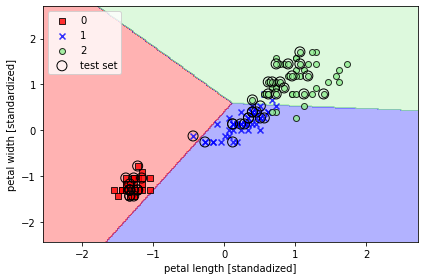

In [56]:
plot_decision_regions(X=X_combined_std, y = y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standadized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 시그모이드 함수

In [57]:
import matplotlib.pyplot as plt
import numpy as np

In [58]:
def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

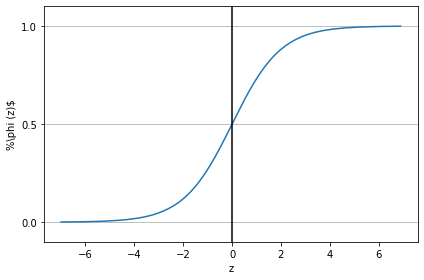

In [60]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,color='k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('%\phi (z)$')

#y축의 눈금과 격자선
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

In [61]:
#분류비용
def cost_1(z):
    return - np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1-sigmoid(z))

### 시그모이드 활성화 대비 로지스틱 비용 그래프

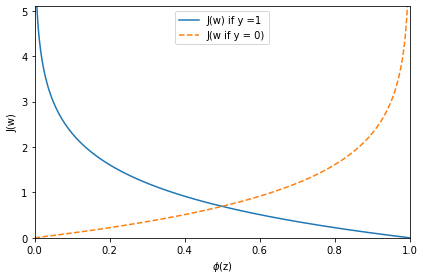

In [63]:
z= np.arange(-10,10,0.1)
phi_z =sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z,c1,label = 'J(w) if y =1')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z,c0,linestyle='--',label='J(w if y = 0)')
plt.ylim(0.0,5.1)
plt.xlim([0,1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 로지스틱 회귀 모델

In [99]:
class LogisticRegressionGD(object):
    def __init__(self,eta=0.05,n_iter=100,random_state=1):#초기화
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):#학습
        rgen = np.random.RandomState(self.random_state)#난수
        self.w_ = rgen.normal(loc=0.0,scale=0.01,size=1+X.shape[1])#기울기 초기화
        self.cost_ = []#로지스틱 비용 함수 값
        
        for i in range(self.n_iter):#가중치 반복 갱신
            net_input = self.net_input(X)#최종 입력 값
            #print("net_input;",net_input.shape)
            output = self.activation(net_input)#활성화 함수(로지스틱 시그모이드)
            #print("output;",output.shape)
            #print("y;",y.shape)
            errors = ( y - output)#손실
            self.w_[1:] += self.eta * X.T.dot(errors)#가중치
            self.w_[0] += self.eta*errors.sum()#절편
            
            #오차제곱합 대신 로지스틱 비용 계산
            cost = (-y.dot(np.log(output))-((1-y).dot(np.log(1-output))))#로지스틱 비용 계산
            self.cost_.append(cost)#비용 추가
        return self
    
    def net_input(self,X):#최종 입력 계산
        return np.dot(X, self.w_[1:])+self.w_[0]
    
    def activation(self,z):
        return 1./(1. + np.exp(-np.clip(z,-250,250)))#로지스틱 시그모이드
    
    def predict(self,X):#예측
        """단위 계단 함수 사용하여 클래스 레이블을 반환"""
        return np.where(self.net_input(X)>=0.0,1,0)#계단 함수

In [100]:
X_train_01_subset = X_train[(y_train == 0)|(y_train==1)]#이진 분류 훈련 데이터셋
y_train_01_subset = y_train[(y_train==0)|y_train==1]
lrgd = LogisticRegressionGD(eta=0.05,n_iter=1000,random_state=1)#로지스틱 회귀 모델

In [101]:
X_train_01_subset.shape

(70, 2)

In [102]:
y_train_01_subset.shape

(70,)

In [103]:
lrgd.fit(X_train_01_subset, y_train_01_subset)#훈련

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


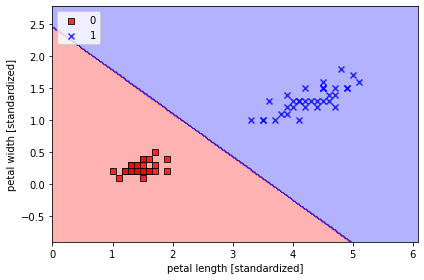

In [104]:
plot_decision_regions(X=X_train_01_subset, y = y_train_01_subset, classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 사이킷런을 사용하여 로지스틱 회귀 모델 훈련

In [106]:
from sklearn.linear_model import LogisticRegression#로지스틱 회귀
lr = LogisticRegression(solver = 'liblinear',multi_class='auto',C=100.0,random_state=1)

In [107]:
lr.fit(X_train_std,y_train)#훈련

LogisticRegression(C=100.0, random_state=1, solver='liblinear')

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


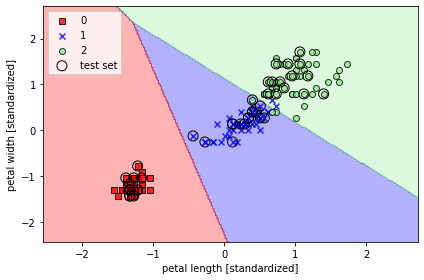

In [109]:
plot_decision_regions(X_combined_std,y_combined,classifier=lr,test_idx = range(105,150))#결정경계
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [110]:
lr.predict_proba(X_test_std[:3,:])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [112]:
lr.predict_proba(X_test_std[:3,:]).argmax(axis = 1)

array([2, 0, 0], dtype=int64)

In [113]:
lr.predict(X_test_std[:3,:])

array([2, 0, 0])

In [115]:
lr.predict(X_test_std[0,:].reshape(1,-1))

array([2])

### 규제

In [116]:
#규제 매개변수에 따른 가중치 크기의 변화
weights, params = [],[]
for c in np.arange(-5,5):
    lr = LogisticRegression(solver='liblinear',multi_class='auto',C=10.**c,random_state=1)#C는 규제 하이퍼파리머터의 역수로 규제 강도와 반비례한다
    lr.fit(X_train_std,y_train)
    weights.append(lr.coef_[1])
    params.append(10.**c)

In [117]:
weights = np.array(weights)

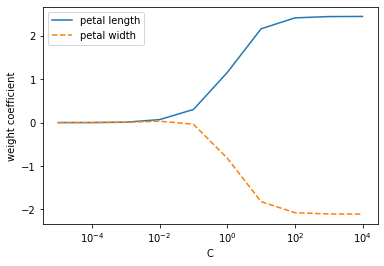

In [118]:
plt.plot(params,weights[:,0],label = 'petal length')
plt.plot(params,weights[:,1],linestyle = '--',label = 'petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

### SVM

In [121]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear', C=1.0,random_state=1)

In [122]:
svm.fit(X_train_std,y_train)#훈련

SVC(kernel='linear', random_state=1)

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


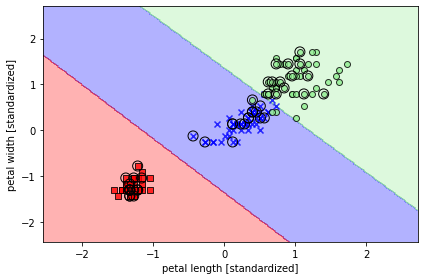

In [123]:
plot_decision_regions(X_combined_std,y_combined,classifier=svm,test_idx=range(105,150))#결정경계 그리기
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.tight_layout()
plt.show()

In [124]:
#사이킷런의 다른 구현
from sklearn.linear_model import SGDClassifier
ppn = SGDClassifier(loss = 'perceptron')#퍼셉트론
lr = SGDClassifier(loss ='log')#로지스틱회귀
svm = SGDClassifier(loss='hinge')#서포트벡터머신(SVM)

In [126]:
#선형적으로 구분되지 않는 데이터를 위한 커널 방법
np.random.seed(1)
X_xor=np.random.randn(200,2)#XOR
y_xor = np.logical_xor(X_xor[:,0]>0, X_xor[:,1]>0)#XOR
y_xor = np.where(y_xor,1,-1)

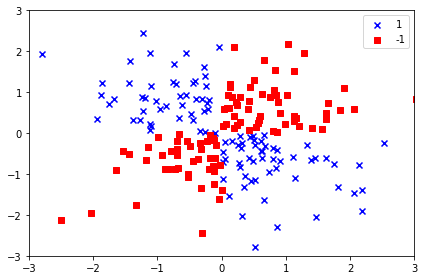

In [127]:
plt.scatter(X_xor[y_xor==1,0],X_xor[y_xor==1,1],c='b',marker='x',label='1')
plt.scatter(X_xor[y_xor==-1,0],X_xor[y_xor==-1,1],c='r',marker='s',label='-1')
plt.xlim([-3,3])
plt.ylim([-3,3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 커널 SVM이 학습한 XOR 데이터셋의 결정경계

In [129]:
svm = SVC(kernel='rbf',random_state=1, gamma=0.10,C=10.0)
svm.fit(X_xor,y_xor)

SVC(C=10.0, gamma=0.1, random_state=1)

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


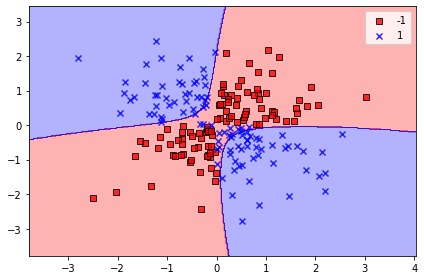

In [130]:
plot_decision_regions(X_xor,y_xor,classifier=svm)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#### 작은 gamma의 경우

In [132]:
svm = SVC(kernel='rbf', random_state=1,gamma=0.2,C=1.0)#작은 gamma(0.2)
svm.fit(X_train_std, y_train)

SVC(gamma=0.2, random_state=1)

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


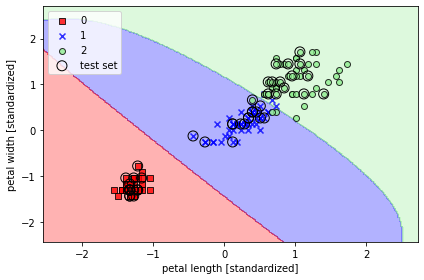

In [134]:
plot_decision_regions(X_combined_std, y_combined, classifier=svm, test_idx = range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

큰 gamma의 경우

In [135]:
svm = SVC(kernel = 'rbf', random_state=1, gamma=100.0,C=1.0)#큰 gamma(100.0)
svm.fit(X_train_std, y_train)

SVC(gamma=100.0, random_state=1)

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


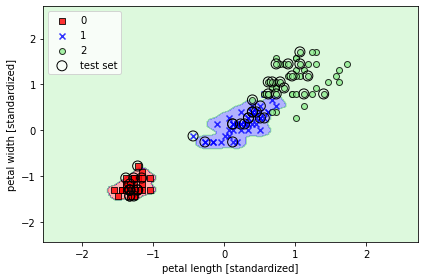

In [136]:
plot_decision_regions(X_combined_std, y_combined, classifier =svm, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 결정 트리 학습

#### 불순도(지니불순도, 엔트로피, 분류오차) 비교

지니불순도

In [137]:
def gini(p):
    return (p)*(1-(p))+(1-p)*(1-(1-p))

엔트로피

In [138]:
def entropy(p):
    return -p*np.log2(p)-(1-p)*np.log2((1-p))

분류 오차

In [139]:
def error(p):
    return 1-np.max([p,1-p])

In [141]:
x = np.arange(0.0,1.0,0.01)
ent = [entropy(p) if p!=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]#스케일 조정된 엔트로피
err = [error(i) for i in x]#분류 오차

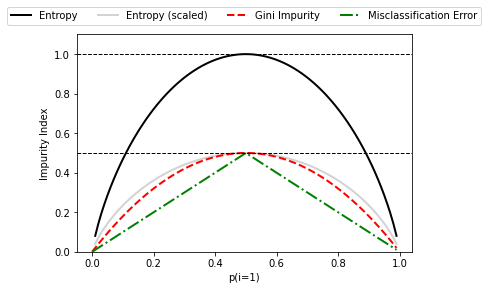

In [144]:
fig = plt.figure()
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent,sc_ent,gini(x),err],
                         ['Entropy','Entropy (scaled)', 'Gini Impurity', 'Misclassification Error'],
                         ['-','-','--','-.'],
                         ['black','lightgray','red','green','cyan']):
    line = ax.plot(x,i,label = lab, linestyle=ls,lw=2,color = c)
ax.legend(loc ='upper center', bbox_to_anchor = (0.5,1.15),
         ncol = 5, fancybox = True, shadow = False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')
plt.ylim([0,1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

#### 결정트리 만들기

In [145]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=1)

In [146]:
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [148]:
X_combined = np.vstack((X_train,X_test))
y_combined = np.hstack((y_train,y_test))

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


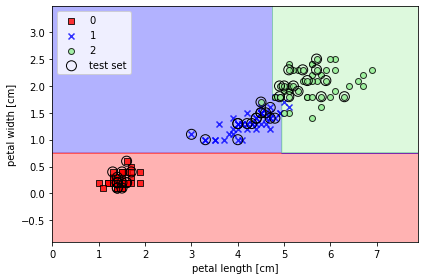

In [149]:
plot_decision_regions(X_combined, y_combined, classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

In [150]:
!pip3 install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=44f78ac101b2d2dcf7e94065c80dbf64726515ce39ee50361127768fed78f1d9
  Stored in directory: c:\users\lg\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [154]:
!pip3 install graphviz

In [155]:
!pip3 install pyparsing

#### PNG 포맷 결정트리 이미지 생성

In [151]:
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz

In [156]:
dot_data = export_graphviz(tree, filled=True,
                          rounded=True,
                          class_names=['Setosa','Versicolor','Virginica'],
                          feature_names=['petal length','petal width'],
                          out_file = None)

In [157]:
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

InvocationException: GraphViz's executables not found

### 랜덤포레스트

In [158]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='gini',n_estimators = 25,#25개 결정트리
                               random_state=1,
                               n_jobs=2#랜덤포레스트 분류기
                               )

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


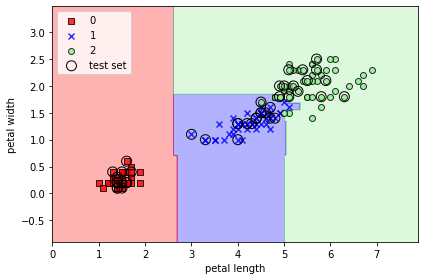

In [159]:
forest.fit(X_train,y_train)
plot_decision_regions(X_combined,y_combined,classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()

### KNN

In [162]:
from sklearn.neighbors import KNeighborsClassifier#KNN
knn = KNeighborsClassifier(n_neighbors=5, p=2,#5개 이웃, p = 2:유클리디안 거리
                          metric = 'minkowski')#minkowski 거리: 유클리디안 거리와 맨해튼 거리를 일반화한 것
knn.fit(X_train_std, y_train)#훈련

KNeighborsClassifier()

<ipython-input-54-e783086ec88b>:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y==cl,0], y = X[y==cl,1],


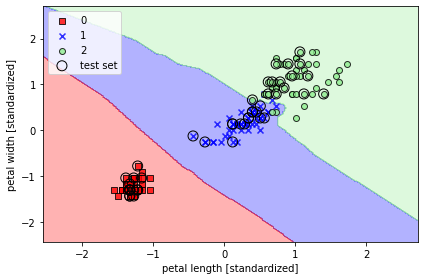

In [163]:
plot_decision_regions(X_combined_std,y_combined, classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc = 'upper left')
plt.tight_layout()
plt.show()